# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Open Weather url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
#TEST REMOVE
city = "London"
query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()     


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Initialize variables
rec = 1
sets = 1
city_name = []
country = []
date = []
humid = []
lat = []
lon = []
max_temp = []
wind_speed = []
clouds = []

# Print report header
print("Beginning Data Retrieval")     
print("-----------------------------")

# Built target lists
for city in cities:
    # Build query URL based on current element in units
    #query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + unit
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()     
    
   
    # Print weather data
    try:
        print(f"Processing Record {rec} of {sets} | {weather_json['name']}")
        
        # Load lists with weater data
        city_name.append(weather_json['name'])
        clouds.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humid.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        
        if rec == 50:
          rec = 0
          sets += 1
        else:
          rec += 1
    except KeyError: 
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 1 | Ayagoz
Processing Record 2 of 1 | Vestmannaeyjar
Processing Record 3 of 1 | Puerto Ayora
Processing Record 4 of 1 | Rikitea
City not found. Skipping...
Processing Record 5 of 1 | Quebo
Processing Record 6 of 1 | Zhigansk
Processing Record 7 of 1 | Kapaa
Processing Record 8 of 1 | Turaif
Processing Record 9 of 1 | Berlevåg
Processing Record 10 of 1 | Praia
Processing Record 11 of 1 | Carndonagh
Processing Record 12 of 1 | San Cristobal
Processing Record 13 of 1 | Albany
City not found. Skipping...
Processing Record 14 of 1 | Souillac
Processing Record 15 of 1 | Ust-Tsilma
Processing Record 16 of 1 | Chernyshevskiy
Processing Record 17 of 1 | Port Elizabeth
Processing Record 18 of 1 | Ostrovnoy
Processing Record 19 of 1 | Vaini
Processing Record 20 of 1 | Chokurdakh
Processing Record 21 of 1 | Cape Town
Processing Record 22 of 1 | Ixtapa
Processing Record 23 of 1 | Makakilo City
Processing Record 24 of 1 | 

Processing Record 4 of 5 | Marawi
Processing Record 5 of 5 | Lakes Entrance
Processing Record 6 of 5 | Kiryat Gat
Processing Record 7 of 5 | The Pas
Processing Record 8 of 5 | Neepawa
Processing Record 9 of 5 | Linxia Chengguanzhen
Processing Record 10 of 5 | Orange
Processing Record 11 of 5 | Ribeira Grande
Processing Record 12 of 5 | Tuktoyaktuk
Processing Record 13 of 5 | Hilo
Processing Record 14 of 5 | Minden
Processing Record 15 of 5 | Cabo San Lucas
Processing Record 16 of 5 | Aklavik
Processing Record 17 of 5 | Mt. Pleasant
Processing Record 18 of 5 | Yazd
Processing Record 19 of 5 | Effingham County
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of 5 | Sioux Lookout
Processing Record 21 of 5 | Bonavista
Processing Record 22 of 5 | Beringovskiy
City not found. Skipping...
Processing Record 23 of 5 | Port Keats
Processing Record 24 of 5 | Anadyr
Processing Record 25 of 5 | Acapulco de Juárez
Processing Record 26 of 5 | Kinsale
Processing Record 27 o

Processing Record 50 of 8 | Yara
Processing Record 0 of 9 | Ciudad Río Bravo
Processing Record 1 of 9 | Barranquilla
Processing Record 2 of 9 | Bakel
Processing Record 3 of 9 | Koson
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of 9 | Terbuny
Processing Record 5 of 9 | Ust-Nera
City not found. Skipping...
Processing Record 6 of 9 | Rexburg
Processing Record 7 of 9 | Bol'shoye Selo
Processing Record 8 of 9 | Mahon
Processing Record 9 of 9 | Lima
Processing Record 10 of 9 | Derzhavīnsk
City not found. Skipping...
Processing Record 11 of 9 | Broome
Processing Record 12 of 9 | Riyadh
Processing Record 13 of 9 | Chāndbāli
Processing Record 14 of 9 | Savonlinna
Processing Record 15 of 9 | Kembé
Processing Record 16 of 9 | Taitung City
Processing Record 17 of 9 | Bilibino
Processing Record 18 of 9 | Kapuskasing
Processing Record 19 of 9 | Rochester
Processing Record 20 of 9 | Teahupoo
City not found. Skipping...
Processing Record 21 of 9 | Hay River
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert weather data to dataframe

weather_pd = pd.DataFrame({
                            "City": city_name,
                            "Cloudiness": clouds,
                            "Country": country,
                            "Date": date,
                            "Humidity": humid,
                            "Lat": lat,
                            "Lon": lon,
                            "Max Temp": max_temp,
                            "Max Temp K": max_temp,
                            "Wind Speed": wind_speed
                          })

# Give index a name and change Temp to float
weather_pd.index.name = 'City_ID'
weather_pd["Max Temp"] = round(((weather_pd["Max Temp"].astype(float)*1.80 )- 459.67),0).astype(int)

# Create and export csv file
weather_pd.to_csv(output_data_file)

# Display dataframe
weather_pd.head(5)


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Max Temp K,Wind Speed
City_ID,,,,,,,,,,
0,Ayagoz,48,KZ,1593139265,41,47.97,80.44,73,296.06,2.13
1,Vestmannaeyjar,100,IS,1593139483,82,63.44,-20.27,51,283.68,3.25
2,Puerto Ayora,35,EC,1593139483,93,-0.74,-90.35,70,294.26,3.15
3,Rikitea,29,PF,1593139483,85,-23.12,-134.97,75,297.30,11.04
4,Quebo,84,GW,1593139484,92,11.33,-14.93,77,298.00,1.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

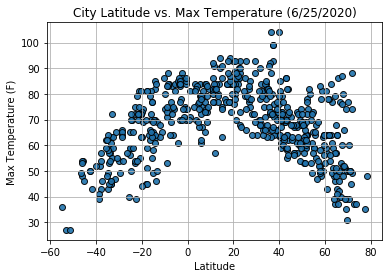

In [6]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Max Temp"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsTemp")
plt.show()


The code is analyzing the temperatures as you move away from the equator.

#### Latitude vs. Humidity Plot

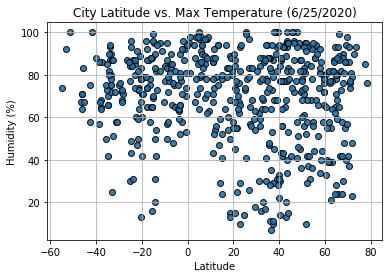

In [7]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Humidity"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Max Temperature {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsHumidity")
plt.show()


The code is analyzing the humidity percentages as you move away from the equator.

#### Latitude vs. Cloudiness Plot

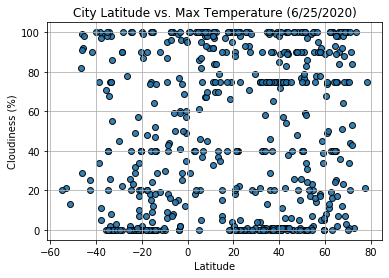

In [8]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Cloudiness"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Max Temperature {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsCloudy")
plt.show()

The code is analyzing the cloudiness percent as you move away from the equator.

#### Latitude vs. Wind Speed Plot

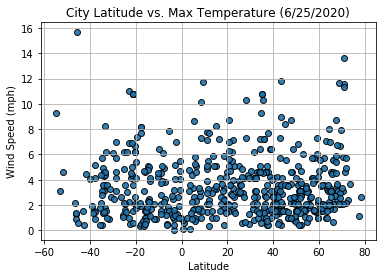

In [9]:
# Calculate variables
x_axis = weather_pd["Lat"]
y_axis = weather_pd["Wind Speed"]
result = time.localtime()
cur_date = f"({result.tm_mon}/{result.tm_mday}/{result.tm_year})"

# Create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="#1f72ac", edgecolors="black",alpha=0.90)


# Set Plot options and display plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Max Temperature {cur_date}")
plt.grid(True)
plt.savefig("../output_data/LatvsWind")
plt.show()

The code is analyzing the wind speed as you move away from the equator.

## Linear Regression

In [10]:
# Create north and south dataframe
weather_north_pd = weather_pd[weather_pd["Lat"] >= 0]
weather_south_pd = weather_pd[weather_pd["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6303930070605227


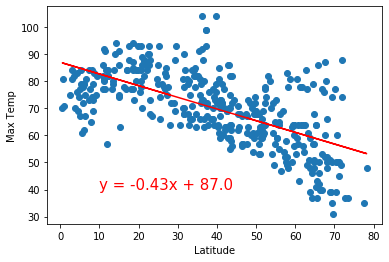

In [11]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsTempNorth")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7396278019743648


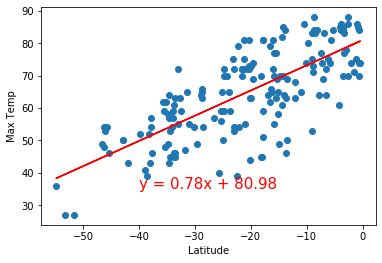

In [12]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsTempSouth")
plt.show()

Maximum temperatures tend to be highest at the equator dropping as you move away in each direction.  
The data seems to be related. The R value is high.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.08543884555955403


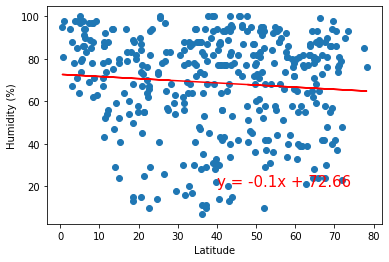

In [13]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsHumidityNorth")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01170706174941705


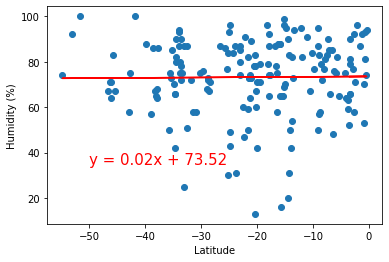

In [14]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsHumiditySouth")
plt.show()

Humidity percentages are unrelated as you move away unrelated as you move away from the eqautor in each direction. 
This is supported by the low R value.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.052828964673024295


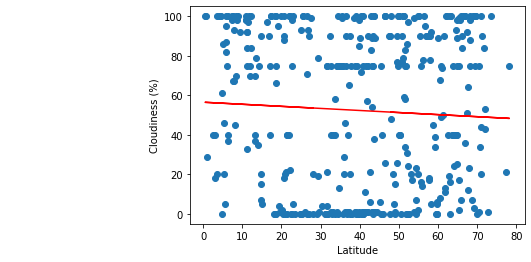

In [15]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsHCloudyNorth")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.019072171059280836


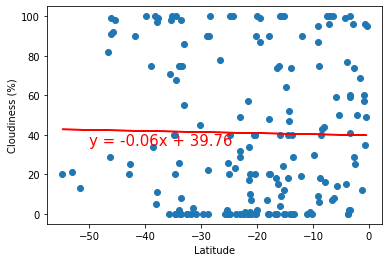

In [16]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsCloudySouth")
plt.show()

Cloudiness percentages are unrelated as you move away from the eqautor in each direction. 
This is supported by the low R value.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.032739674922489366


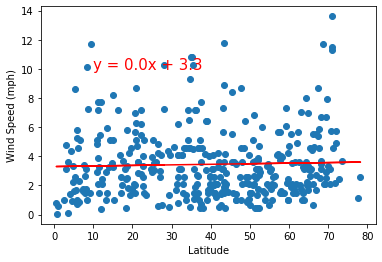

In [17]:
# Calculate variables
x_axis = weather_north_pd["Lat"]
y_axis = weather_north_pd["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsWindNorth")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12394515755201292


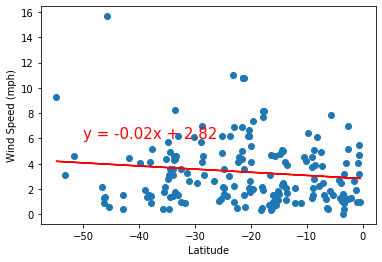

In [18]:
# Calculate variables
x_axis = weather_south_pd["Lat"]
y_axis = weather_south_pd["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
fig, north = plt.subplots() 
line = north.scatter(x_axis, y_axis) 
plt.plot(x_axis,regress_values,"r-")
  
# Add labels
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Display results
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/LatvsWindSouth")
plt.show()

Wind speed seems unrelated as you move away from the equator in each direction. This is supported by the low R value.